# Introdução a Gemini

Este notebook tem o objetivo de apresentar um teste de com os modelos Gemini Pro e Gemini Vision. Como são modelos probabilísticos, é possível que se tenha várias respostas possíveis.

Algumas recomendações:

- Utilize uma versão a versao 3.9 ou superior do Python.

- Para o teste com o modelo gemini Pro Vision é utilizada uma foto autoral da presente autora deste notebook.

- Antes de mais nada é importante gerar sua Google API Key na Google Cloud: https://aistudio.google.com/app/apikey e armazená-la numa variável local. Não a coloque diretamente no código.


In [68]:
import os
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Executar caso seja necessário

!pip install -q -U google-generativeai

In [69]:
from dotenv import load_dotenv

load_dotenv()  # Uso de .env para armazenar a Google API Key como variável local

True

In [70]:
# Carregando variável Local .env

genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

## Gemini Pro

In [71]:
model = genai.GenerativeModel('gemini-pro')

In [72]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [73]:
%%time
response = model.generate_content("O que seria ser educado?")

CPU times: user 15.6 ms, sys: 16.6 ms, total: 32.2 ms
Wall time: 7.97 s


In [74]:
to_markdown(response.text)

> **Ser educado** envolve uma gama complexa de qualidades, habilidades e atributos que demonstram respeito, consideração e um comportamento apropriado em diferentes situações sociais.
> 
> **Qualidades essenciais:**
> 
> * **Respeito:** Reconhecer e valorizar os outros, independentemente de suas diferenças ou opiniões.
> * **Consideração:** Levar em conta os sentimentos, necessidades e perspectivas das outras pessoas.
> * **Empatia:** Ser capaz de compreender e compartilhar os sentimentos e experiências dos outros.
> * **Humildade:** Reconhecer as próprias limitações e estar disposto a aprender e crescer.
> * **Integridade:** Agir de acordo com princípios éticos e morais sólidos.
> 
> **Habilidades importantes:**
> 
> * **Comunicação eficaz:** Expressar pensamentos e ideias de forma clara, respeitosa e apropriada.
> * **Escuta ativa:** Prestar atenção, ouvir com compreensão e responder adequadamente.
> * **Resolução de conflitos:** Encontrar soluções pacíficas e respeitosas para desacordos.
> * **Maneiras sociais:** Seguir as normas e convenções sociais de cortesia e etiqueta.
> * **Autocontrole:** Manter a compostura e o equilíbrio emocional, mesmo em situações desafiadoras.
> 
> **Comportamentos apropriados:**
> 
> * **Cumprimentar e se despedir adequadamente.**
> * **Usar títulos e pronomes formais quando apropriado.**
> * **Manter um tom de voz respeitoso e profissional.**
> * **evitar gírias, calúnias ou linguagem ofensiva.**
> * **Vestir-se apropriadamente para a ocasião.**
> * **Demonstrar gratidão e apreço.**
> * **Oferecer ajuda quando necessário.**
> * **Respeitar o espaço pessoal dos outros.**
> * **Ser pontual e confiável.**
> 
> Ser educado não é apenas seguir um conjunto de regras, mas também cultivar uma atitude de respeito e compreensão que permeia todas as interações. É uma qualidade que constrói relacionamentos positivos, promove ambientes respeitosos e contribui para uma sociedade harmoniosa.

In [75]:
# Analisando se o tipo de resposta contém conteúdo inapropriado

response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

## Gemini Pro Vision com Fo

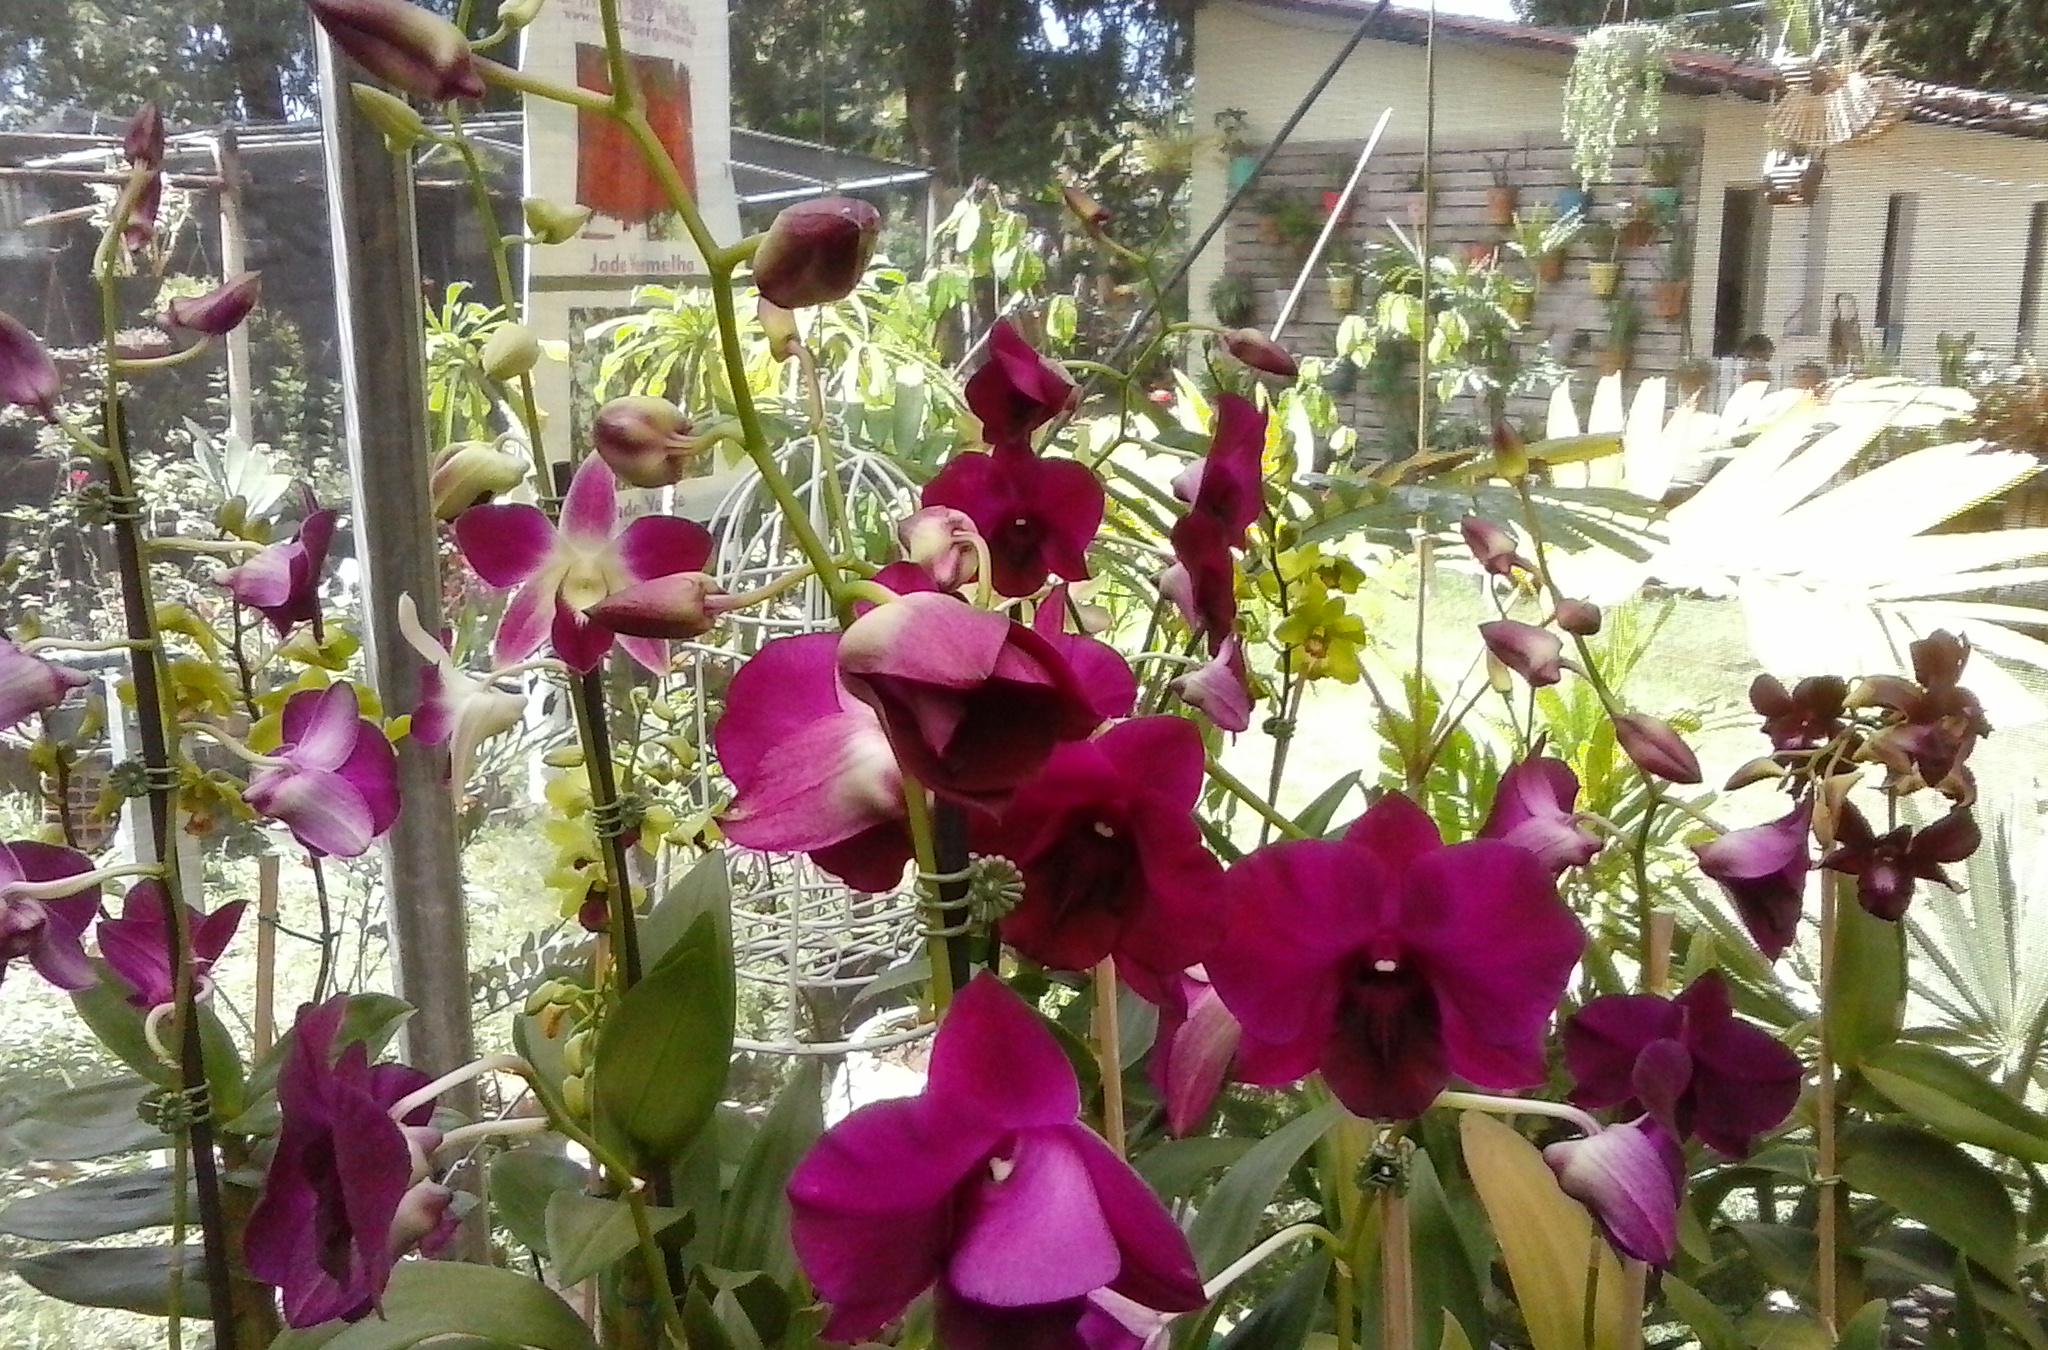

In [76]:
from IPython.display import Image
from IPython.core.display import HTML

img = Image('imagem.jpg')
img

In [77]:
model_vision = genai.GenerativeModel('gemini-pro-vision')

In [78]:
response = model_vision.generate_content(img)

to_markdown(response.text)

>  As orquídeas são flores muito bonitas e delicadas. Elas são encontradas em muitas cores diferentes, como branco, rosa, amarelo, vermelho e roxo. As orquídeas são originárias da Ásia, mas também são encontradas em outras partes do mundo. Elas são cultivadas em vasos ou em árvores. As orquídeas precisam de muita luz e umidade para crescer. Elas também precisam ser regadas regularmente. As orquídeas são flores muito especiais e podem ser usadas para decorar qualquer ambiente.

In [82]:
response = model_vision.generate_content(["Como devo cuidar destas flores? Descreva-me em detalhes.", img], stream=True)
response.resolve()

In [83]:
to_markdown(response.text)

>  Estas flores são orquídeas. Elas são plantas epífitas, o que significa que crescem em árvores ou outras plantas. As orquídeas precisam de muita luz, mas não de luz solar direta. Elas também precisam de muita umidade, mas não de solo encharcado. O melhor tipo de solo para orquídeas é um solo bem drenado, como casca de pinus ou carvão vegetal.
> 
> Para cuidar de orquídeas, você precisará fornecer luz, umidade e solo adequados. Você também precisará regá-las regularmente e fertilizá-las a cada duas semanas.
> 
> Aqui estão algumas dicas para cuidar de orquídeas:
> 
> * Coloque as orquídeas em um local onde elas recebam muita luz, mas não luz solar direta.
> * Regue as orquídeas regularmente, mas não deixe o solo ficar encharcado.
> * Fertilize as orquídeas a cada duas semanas.
> * Remova as flores murchas para estimular o crescimento de novas flores.
> 
> Com os devidos cuidados, suas orquídeas florescerão lindamente e durarão muitos anos.